In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import functions as f
from sklearn.utils import shuffle

In [2]:
dataset = np.load('/home/vlian/Workspace/curriculum_learning_processed_data/samples.npz', allow_pickle=True)

In [3]:
keys_ = list(dataset.keys())
print(keys_)

['adc_5_7', 'adc_8_10', 'adc_11_13', 'adc_14_16', 'adc_17_19', 'adc_20_22', 'adc_gt_22']


In [4]:
adc_5_7_x_train = dataset[keys_[0]][0][0]
adc_5_7_y_train = dataset[keys_[0]][0][1]

adc_5_7_x_valid = dataset[keys_[0]][1][0]
adc_5_7_y_valid = dataset[keys_[0]][1][1]

adc_5_7_x_test = dataset[keys_[0]][2][0]
adc_5_7_y_test = dataset[keys_[0]][2][1]

In [5]:
adc_8_10_x_train = dataset[keys_[1]][0][0]
adc_8_10_y_train = dataset[keys_[1]][0][1]

adc_8_10_x_valid = dataset[keys_[1]][1][0]
adc_8_10_y_valid = dataset[keys_[1]][1][1]

adc_8_10_x_test = dataset[keys_[1]][2][0]
adc_8_10_y_test = dataset[keys_[1]][2][1]

In [6]:
adc_11_13_x_train = dataset[keys_[2]][0][0]
adc_11_13_y_train = dataset[keys_[2]][0][1]

adc_11_13_x_valid = dataset[keys_[2]][1][0]
adc_11_13_y_valid = dataset[keys_[2]][1][1]

adc_11_13_x_test = dataset[keys_[2]][2][0]
adc_11_13_y_test = dataset[keys_[2]][2][1]

In [7]:
print(adc_5_7_x_train.shape)
x_train = np.concatenate((adc_5_7_x_train, adc_8_10_x_train))
print(x_train.shape)
x_train = np.concatenate((x_train, adc_11_13_x_train))
print(x_train.shape)

(160000, 200)
(320000, 200)
(480000, 200)


In [8]:
print(adc_5_7_y_train.shape)
y_train = np.concatenate((adc_5_7_y_train, adc_8_10_y_train))
print(y_train.shape)
y_train = np.concatenate((y_train, adc_11_13_y_train))
print(y_train.shape)

(160000, 200)
(320000, 200)
(480000, 200)


In [9]:
print(adc_5_7_x_valid.shape)
x_valid = np.concatenate((adc_5_7_x_valid, adc_8_10_x_valid))
print(x_valid.shape)
x_valid = np.concatenate((x_valid, adc_11_13_x_valid))
print(x_valid.shape)

(40000, 200)
(80000, 200)
(120000, 200)


In [10]:
print(adc_5_7_y_valid.shape)
y_valid = np.concatenate((adc_5_7_y_valid, adc_8_10_y_valid))
print(x_valid.shape)
y_valid = np.concatenate((y_valid, adc_11_13_y_valid))
print(y_valid.shape)

(40000, 200)
(120000, 200)
(120000, 200)


In [11]:
print(adc_5_7_x_test.shape)
x_test = np.concatenate((adc_5_7_x_test, adc_8_10_x_test))
print(x_train.shape)
x_test = np.concatenate((x_test, adc_11_13_x_test))
print(x_test.shape)

(200000, 200)
(480000, 200)
(600000, 200)


In [12]:
print(adc_5_7_y_test.shape)
y_test = np.concatenate((adc_5_7_y_test, adc_8_10_y_test))
print(y_train.shape)
y_test = np.concatenate((y_test, adc_11_13_y_test))
print(y_test.shape)

(200000, 200)
(480000, 200)
(600000, 200)


In [16]:
for i in range(10):
    x_train, y_train = shuffle(x_train, y_train)
    x_valid, y_valid = shuffle(x_valid, y_valid)
    x_test, y_test = shuffle(x_test, y_test)

In [17]:
mean = np.mean(x_train)
std = np.std(x_train)

In [18]:
x_train_scaled = (x_train[0:80000]-mean)/std
y_train_scaled = (y_train[0:80000]-mean)/std

x_valid_scaled = (x_valid[0:20000]-mean)/std
y_valid_scaled = (y_valid[0:20000]-mean)/std

x_test_scaled = (x_test[0:100000]-mean)/std
y_test_scaled = (y_test[0:100000]-mean)/std

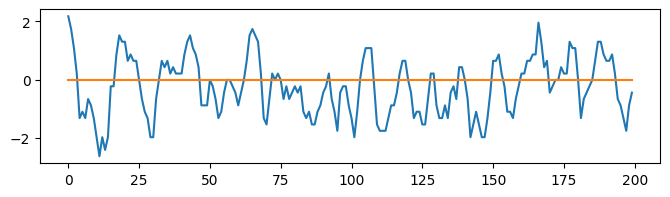

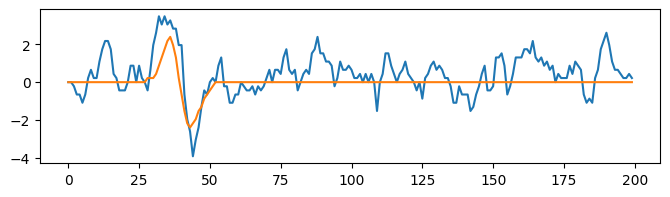

In [20]:
for i in range(2):
    fig = plt.figure(figsize=(8,2))
    plt.plot(x_train_scaled[i])
    plt.plot(y_train_scaled[i])
    plt.show()

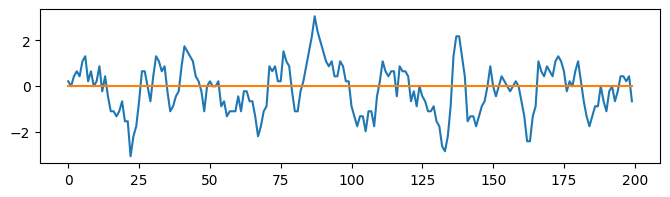

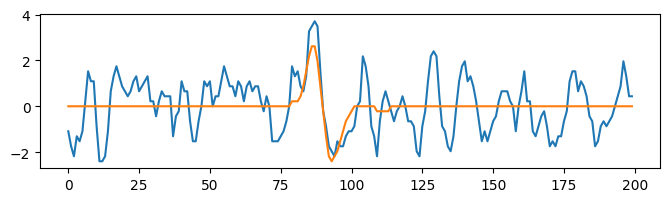

In [24]:
for i in range(1,3):
    fig = plt.figure(figsize=(8,2))
    plt.plot(x_valid_scaled[i])
    plt.plot(y_valid_scaled[i])
    plt.show()

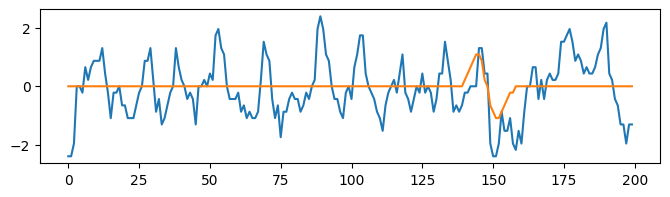

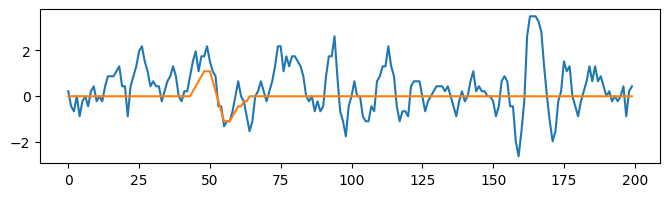

In [25]:
for i in range(1,3):
    fig = plt.figure(figsize=(8,2))
    plt.plot(x_test_scaled[i])
    plt.plot(y_test_scaled[i])
    plt.show()

In [26]:
def roll_signal(signal, seq_len, timestep):
    rolled = np.empty((seq_len, timestep))
    for i in range(seq_len):
        sequence = np.zeros(timestep)
        if i < 4:
            sequence[i+4:len(sequence)] = signal[0:timestep-(i+4)]

        elif i > seq_len-5:
            sequence[:(seq_len-i)+4] = signal[i-4:seq_len]
        else:
            sequence = signal[i-4:i+5]
        rolled[i] = sequence
        
    return rolled
        
    

In [27]:
rolled_train_X = []
rolled_train_Y = []

for wave in x_train_scaled.copy():
    rolled_train_X.append(roll_signal(wave, 200, 9))
    rolled_train_Y.append(roll_signal(y_train_scaled[i], 200, 9))
rolled_train_X = np.array(rolled_train_X)
rolled_train_Y = np.array(rolled_train_Y)

In [28]:
print(rolled_train_X.shape, rolled_train_Y.shape)

(80000, 200, 9) (80000, 200, 9)


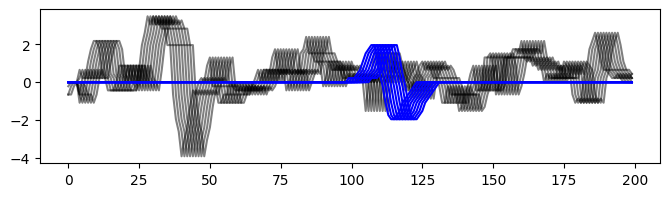

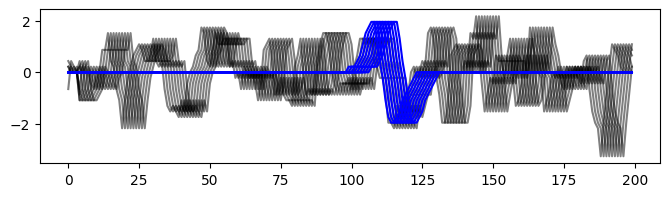

In [29]:
for i in range(1,3):
    fig = plt.figure(figsize=(8,2))
    plt.plot(rolled_train_X[i], color='black', alpha=0.5)
    plt.plot(rolled_train_Y[i], color='blue')
    plt.show()

In [30]:
rolled_valid_X = []
rolled_valid_Y = []

for wave in x_valid_scaled.copy():
    rolled_valid_X.append(roll_signal(wave, 200, 9))
    rolled_valid_Y.append(roll_signal(y_valid_scaled[i], 200, 9))
rolled_valid_X = np.array(rolled_valid_X)
rolled_valid_Y = np.array(rolled_valid_Y)
print(rolled_valid_X.shape, rolled_valid_Y.shape)

(20000, 200, 9) (20000, 200, 9)


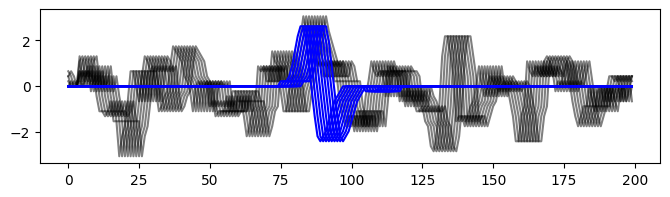

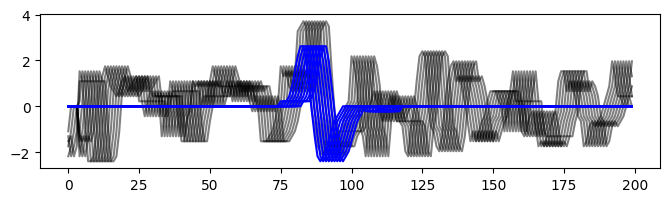

In [32]:
for i in range(1,3):
    fig = plt.figure(figsize=(8,2))
    plt.plot(rolled_valid_X[i], color='black', alpha=0.5)
    plt.plot(rolled_valid_Y[i], color='blue')
    plt.show()

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed


# Custom layer for scalar multiplication to use as signal amplifier
class ScalarMultiplyLayer(layers.Layer):
    def __init__(self):
        super(ScalarMultiplyLayer, self).__init__()
        self.scalar = self.add_weight(shape=(1,), initializer='ones', trainable=True)

    def call(self, inputs):
        return inputs * self.scalar

# Define the EDRDAE model architecture
# Paper describes: one encoder layer followed by two decoder
# layers with bidirectional LSTM cells
def build_edrdae_model(input_shape, num_channels):
    model = keras.Sequential()
    print('DEBUG: ', input_shape)
    


    # Encoder
    encoder = layers.Bidirectional(layers.LSTM(num_channels, return_sequences=True), input_shape=input_shape)
    model.add(encoder)

    # Hidden layers
    #for _ in range(num_layers):
    #    hidden_layer = layers.Bidirectional(layers.LSTM(num_channels, return_sequences=True))
    #    model.add(hidden_layer)
    
    # Decoder
    decoder_layer1 = layers.Bidirectional(layers.LSTM(num_channels, return_sequences=True))
    model.add(decoder_layer1)
    decoder_layer2 = layers.Bidirectional(layers.LSTM(num_channels, return_sequences=True))
    model.add(decoder_layer2)

    # Signal Amplifier
    #signal_amplifier = layers.Dense(num_channels, activation='relu')
    #model.add(signal_amplifier)


    
    model.add(TimeDistributed(Dense(1, activation='linear')))

    # Signal Amplifier
    model.add(ScalarMultiplyLayer())
    
    return model





In [34]:

# Define the model parameters
timesteps = 9  # (timestep of 9 was best in paper)
num_channels = 64  # Number of channels for LSTM cells




In [35]:
# Reshape the input shape to match the training data
input_shape = (200, timesteps)

# Build the EDRDAE model
model = build_edrdae_model(input_shape, num_channels)



# Compile the model
lr = 0.0001  # learning rate
adam = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=adam, loss='mse')

DEBUG:  (200, 9)


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200, 128)         37888     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 200, 1)           129       
 ibuted)                                                         
                                                                 
 scalar_multiply_layer (Scal  (None, 200, 1)           1

In [37]:
%who

Bidirectional	 Dense	 LSTM	 ScalarMultiplyLayer	 TimeDistributed	 adam	 adc_11_13_x_test	 adc_11_13_x_train	 adc_11_13_x_valid	 
adc_11_13_y_test	 adc_11_13_y_train	 adc_11_13_y_valid	 adc_5_7_x_test	 adc_5_7_x_train	 adc_5_7_x_valid	 adc_5_7_y_test	 adc_5_7_y_train	 adc_5_7_y_valid	 
adc_8_10_x_test	 adc_8_10_x_train	 adc_8_10_x_valid	 adc_8_10_y_test	 adc_8_10_y_train	 adc_8_10_y_valid	 build_edrdae_model	 dataset	 f	 
fig	 h5py	 i	 input_shape	 keras	 keys_	 layers	 lr	 mean	 
model	 np	 num_channels	 os	 plt	 roll_signal	 rolled_train_X	 rolled_train_Y	 rolled_valid_X	 
rolled_valid_Y	 shuffle	 std	 tf	 timesteps	 wave	 x_test	 x_test_scaled	 x_train	 
x_train_scaled	 x_valid	 x_valid_scaled	 y_test	 y_test_scaled	 y_train	 y_train_scaled	 y_valid	 y_valid_scaled	 



In [38]:
del adc_11_13_x_test, adc_11_13_x_train, adc_11_13_x_valid, adc_11_13_y_test, adc_11_13_y_train, adc_11_13_y_valid, adc_5_7_x_test
del adc_5_7_x_train, adc_5_7_x_valid, adc_5_7_y_test, adc_5_7_y_train, adc_5_7_y_valid, adc_8_10_x_test, adc_8_10_x_train
del adc_8_10_x_valid, adc_8_10_y_test, adc_8_10_y_train, adc_8_10_y_valid, x_train, x_train_scaled, x_valid, x_valid_scaled, y_train
del y_train_scaled, y_valid, y_valid_scaled

In [39]:
%who

Bidirectional	 Dense	 LSTM	 ScalarMultiplyLayer	 TimeDistributed	 adam	 build_edrdae_model	 dataset	 f	 
fig	 h5py	 i	 input_shape	 keras	 keys_	 layers	 lr	 mean	 
model	 np	 num_channels	 os	 plt	 roll_signal	 rolled_train_X	 rolled_train_Y	 rolled_valid_X	 
rolled_valid_Y	 shuffle	 std	 tf	 timesteps	 wave	 x_test	 x_test_scaled	 y_test	 
y_test_scaled	 


In [42]:
rolled_train_X.shape

(80000, 200, 9)

In [43]:
rolled_train_Y.shape

(80000, 200, 9)

In [44]:
batch_size_ = 2048


earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)


print('begin training...')
history = model.fit(rolled_train_X, rolled_train_Y, 
                    batch_size=batch_size_, callbacks= [earlystop],
                    validation_data=(rolled_valid_X, rolled_valid_Y), 
                    epochs=1000, verbose=1)

begin training...
Epoch 1/1000
40/40 [==============================] - 19s 247ms/step - loss: 0.1850 - val_loss: 0.2588
Epoch 2/1000
40/40 [==============================] - 8s 207ms/step - loss: 0.1844 - val_loss: 0.2587
Epoch 3/1000
40/40 [==============================] - 8s 206ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 4/1000
40/40 [==============================] - 8s 207ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 5/1000
40/40 [==============================] - 8s 209ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 6/1000
40/40 [==============================] - 8s 209ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 7/1000
40/40 [==============================] - 8s 212ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 8/1000
40/40 [==============================] - 8s 207ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 9/1000
40/40 [==============================] - 8s 206ms/step - loss: 0.1843 - val_loss: 0.2587
Epoch 10/1000
40/40 [==============================] - 8s 207ms

In [46]:
model.save('rnn_model_attempt_OUR_DATA_NO_CL.h5')

In [47]:
rolled_test_X = []

for wave in x_test_scaled.copy():
    rolled_test_X.append(roll_signal(wave, 200, 9))
    #rolled_train_Y.append(roll_signal(y_train_scaled[i], 200, 9))
rolled_test_X = np.array(rolled_test_X)

In [48]:
print('start inference...')
pred = model.predict(rolled_test_X, batch_size=2048)
pred = pred.reshape(pred.shape[0], pred.shape[1])
pred = pred*std + mean


start inference...
49/49 [==============================] - 5s 72ms/step


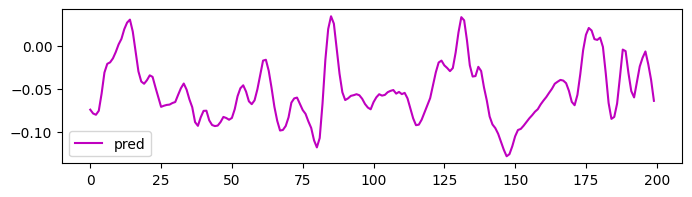

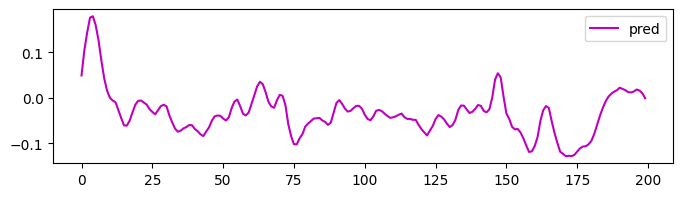

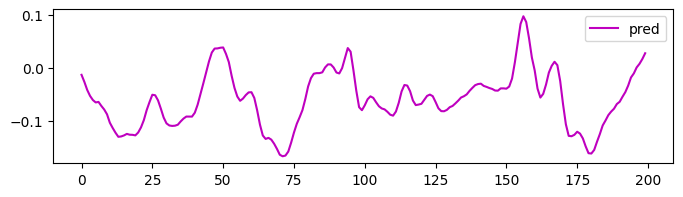

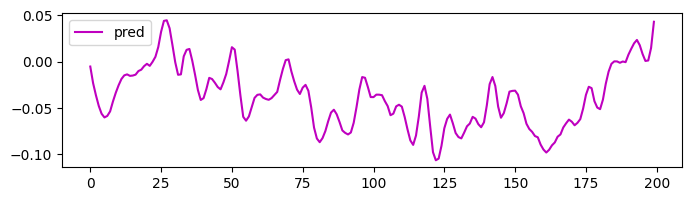

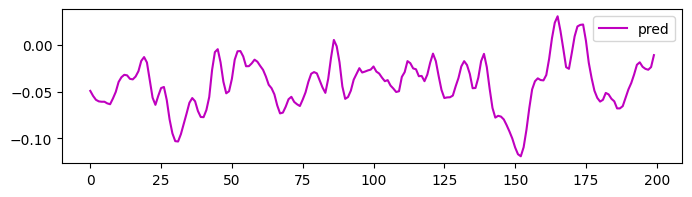

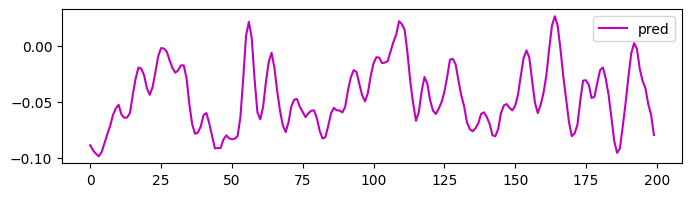

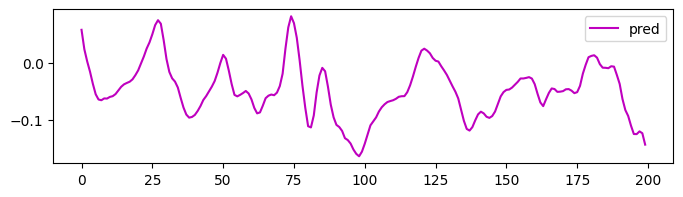

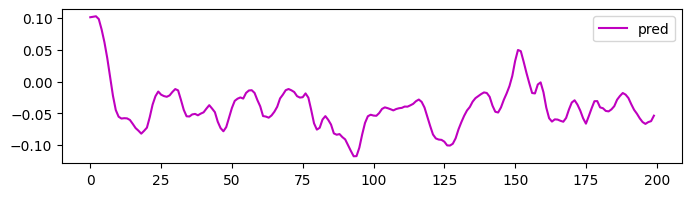

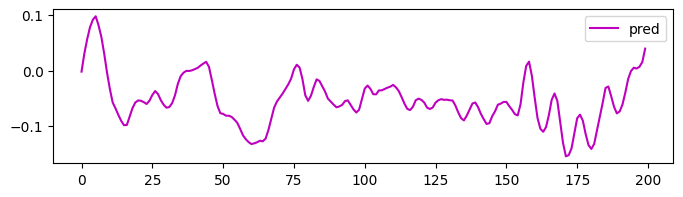

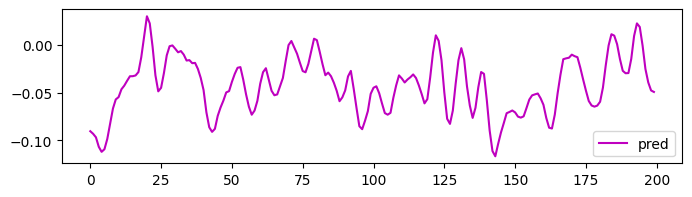

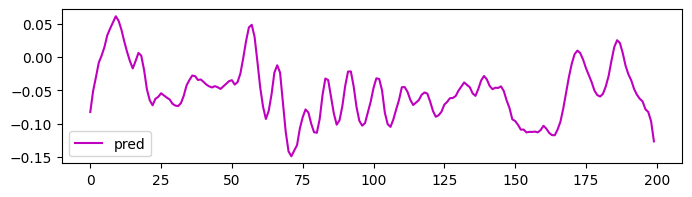

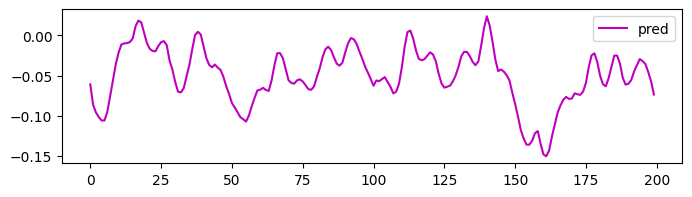

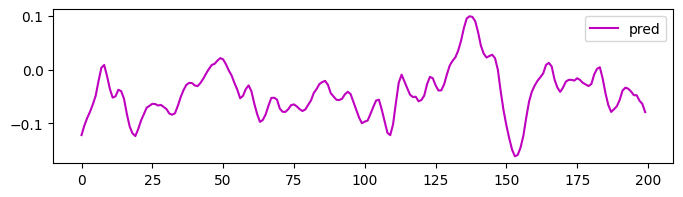

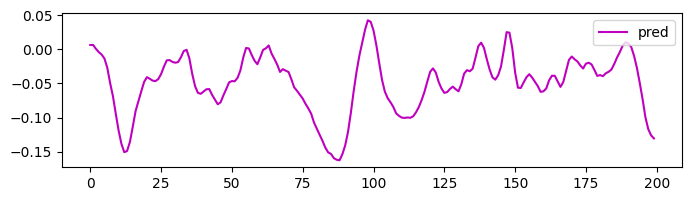

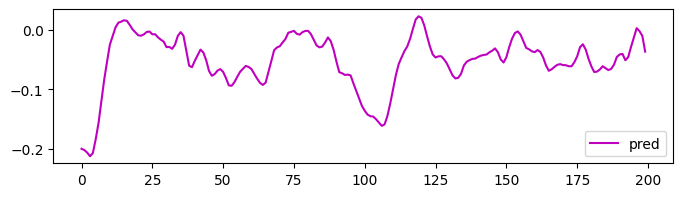

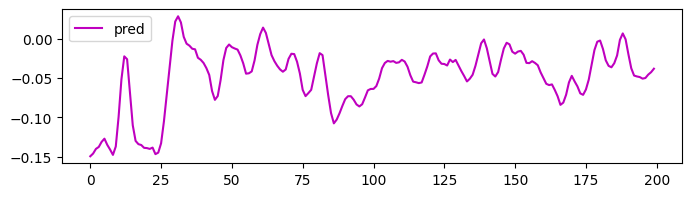

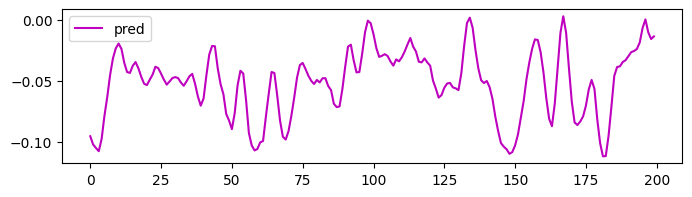

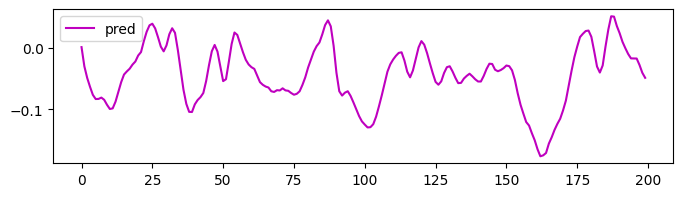

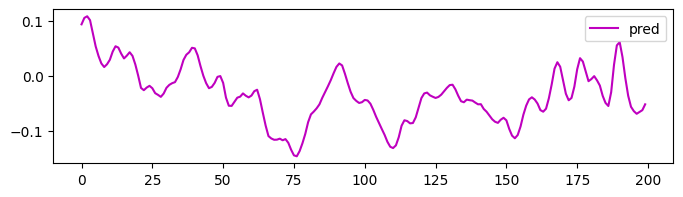

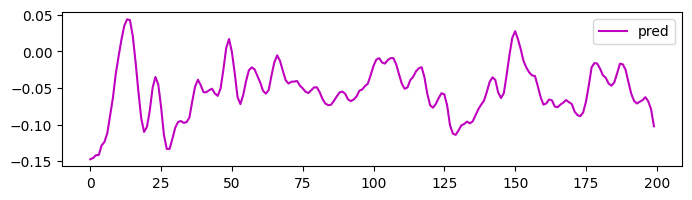

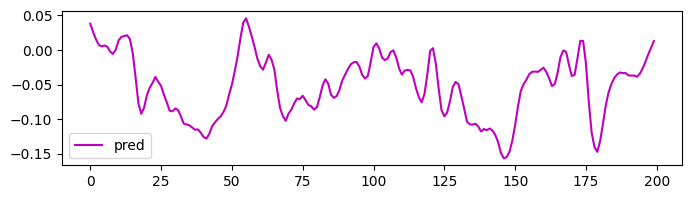

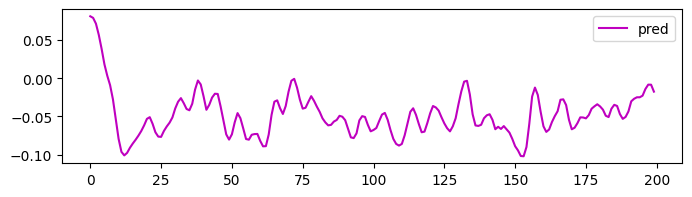

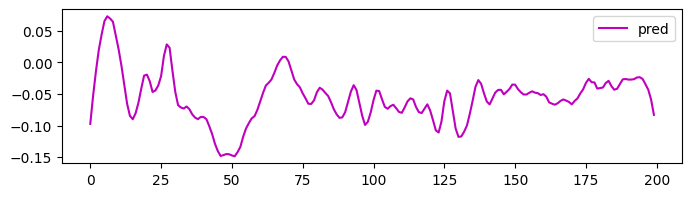

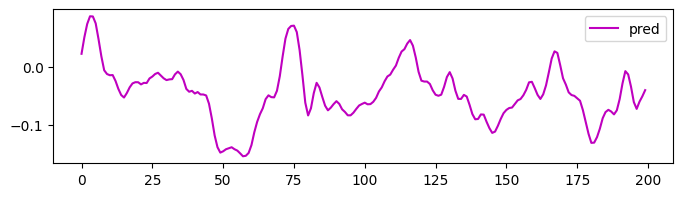

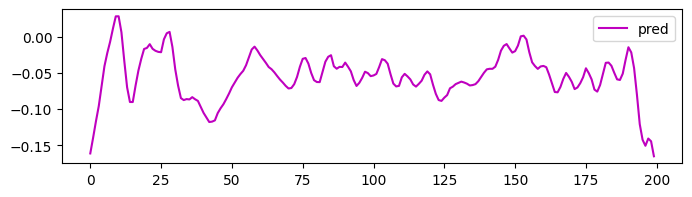

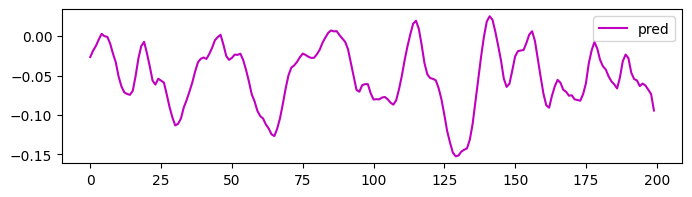

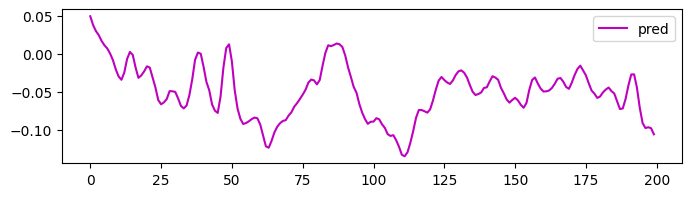

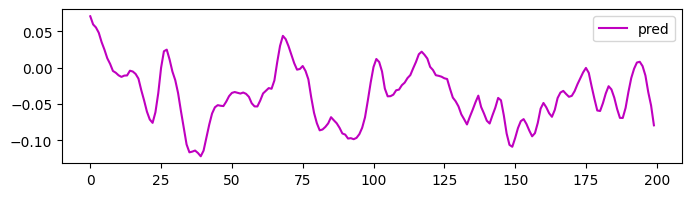

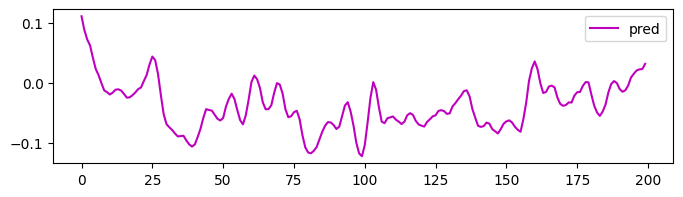

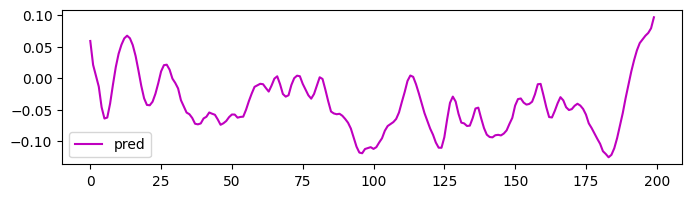

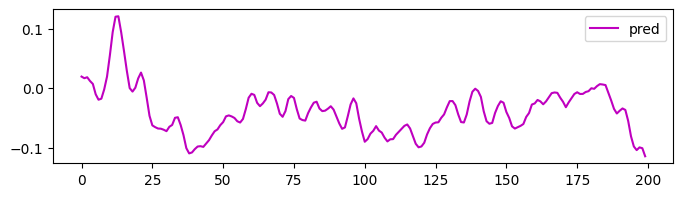

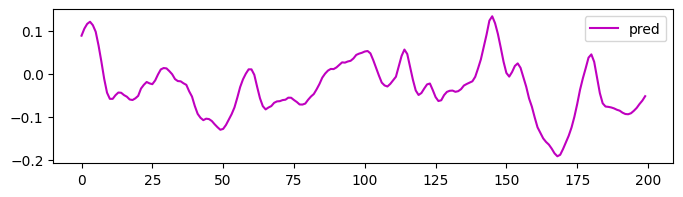

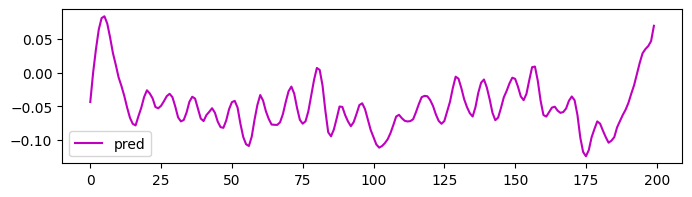

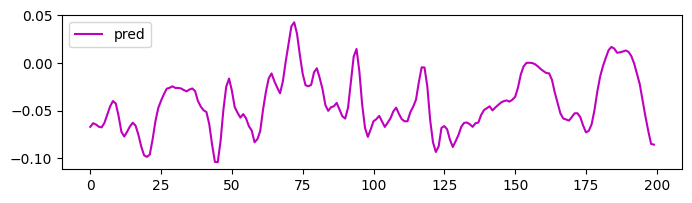

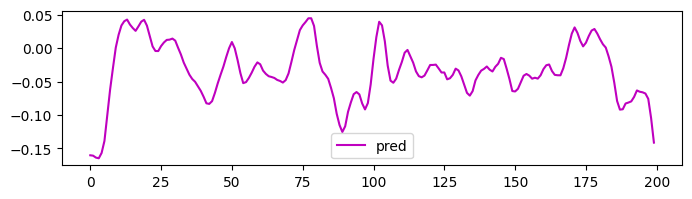

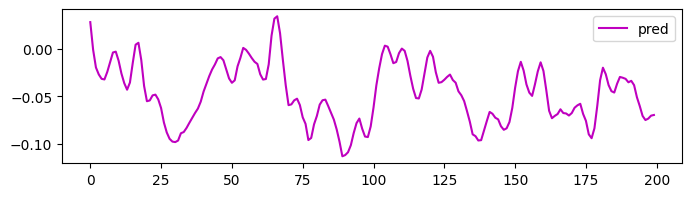

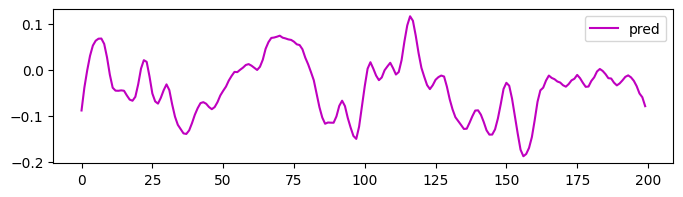

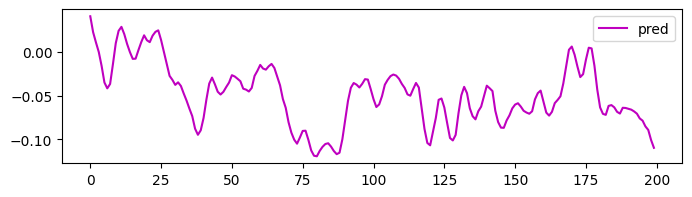

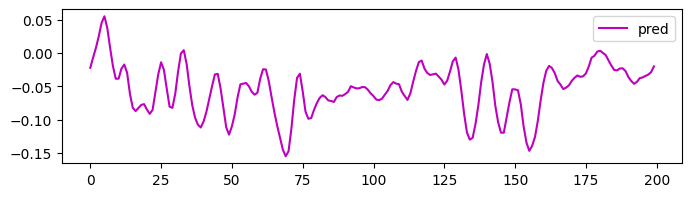

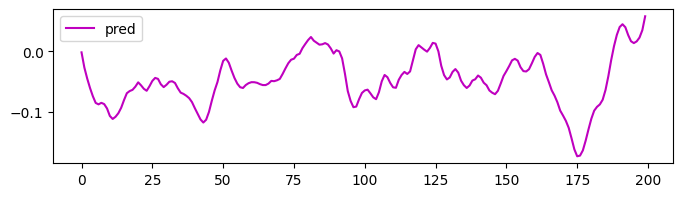

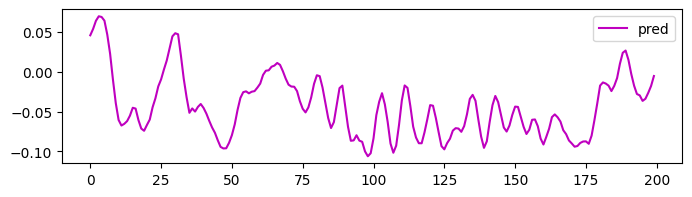

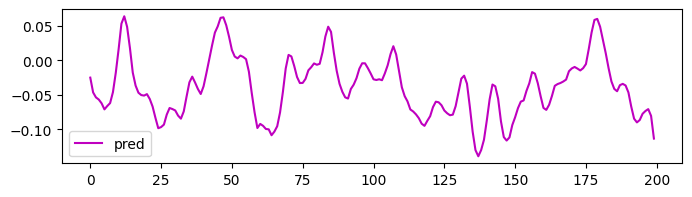

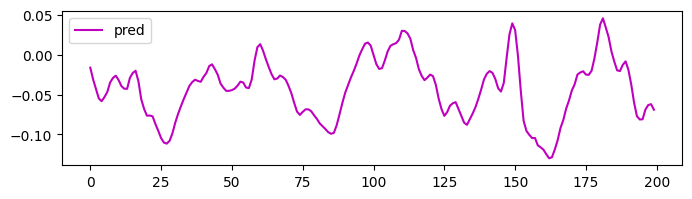

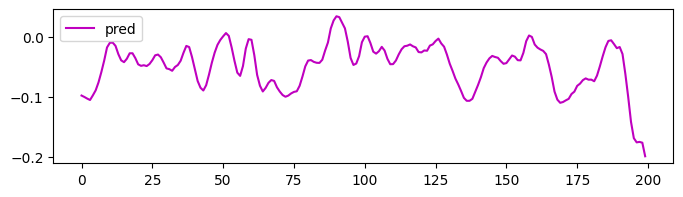

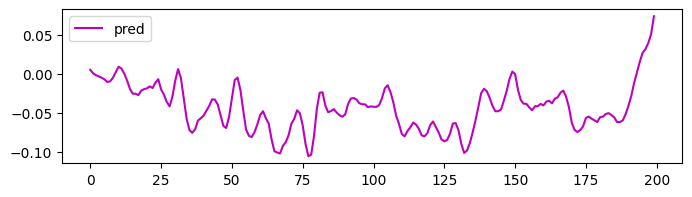

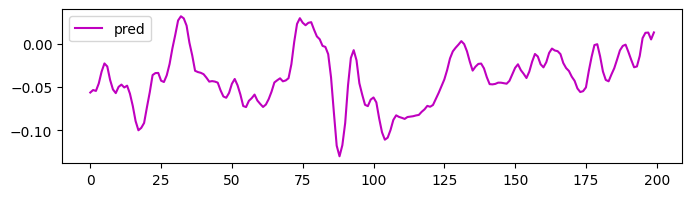

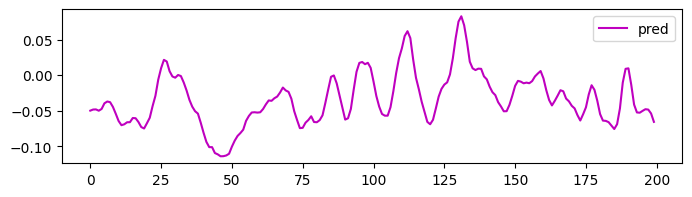

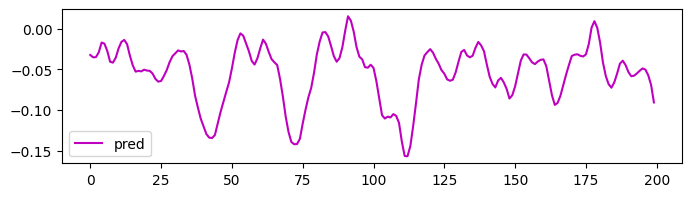

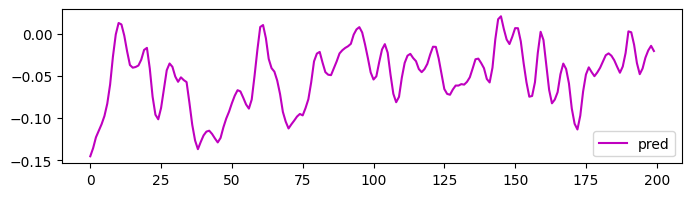

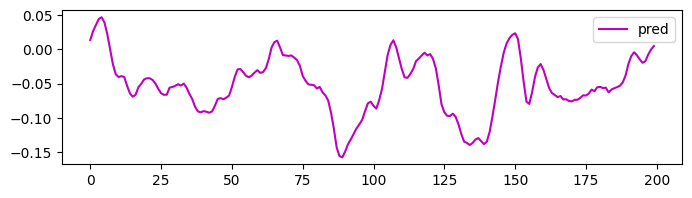

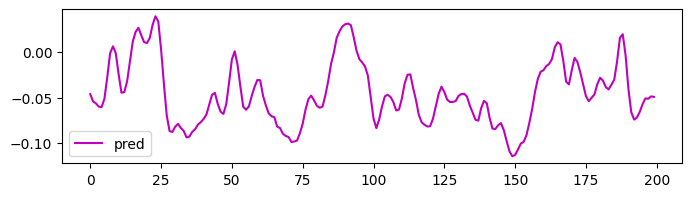

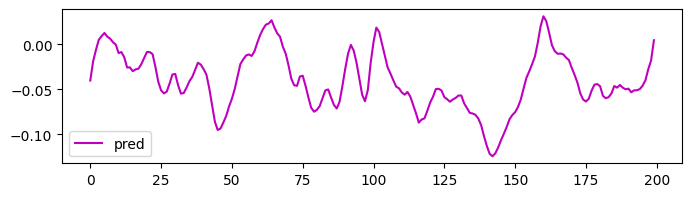

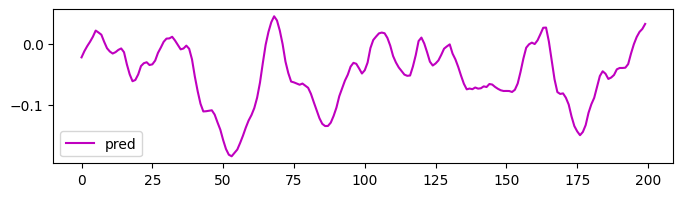

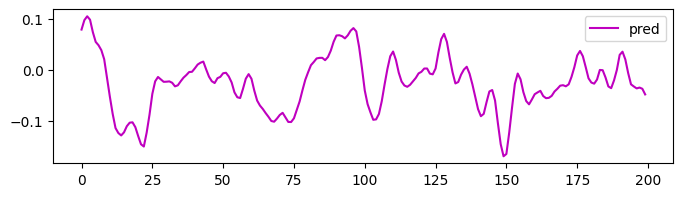

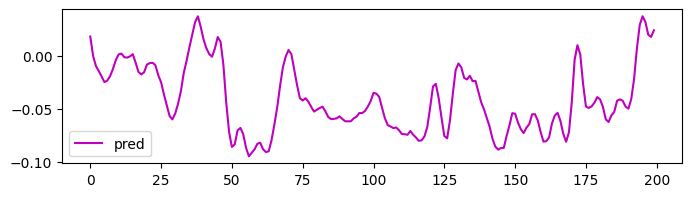

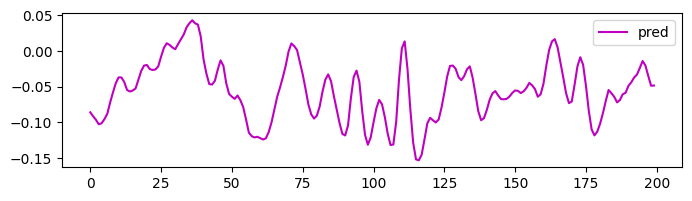

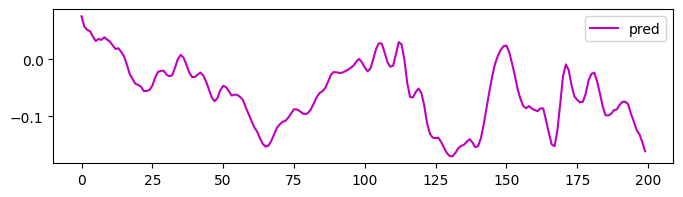

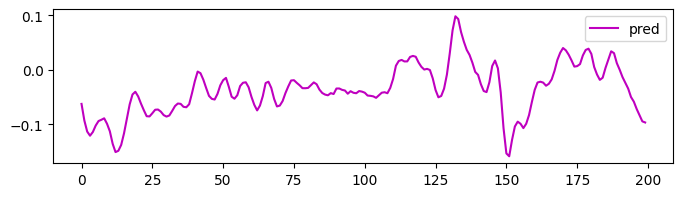

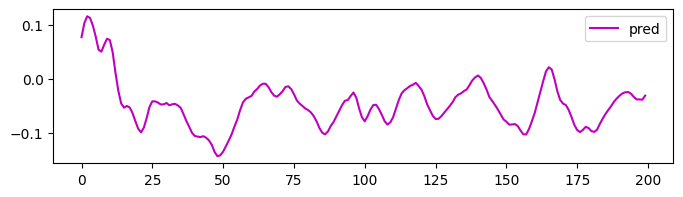

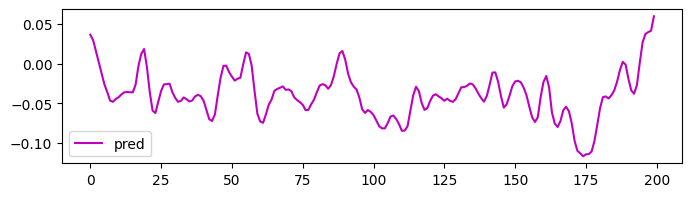

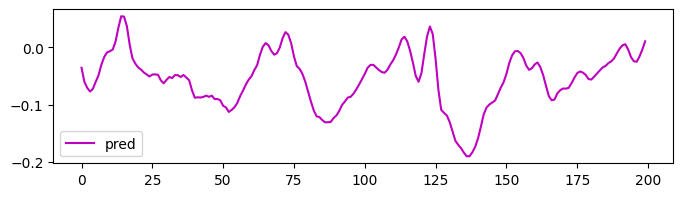

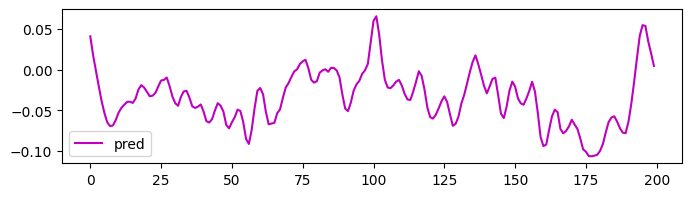

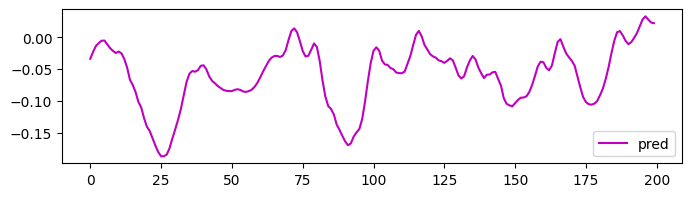

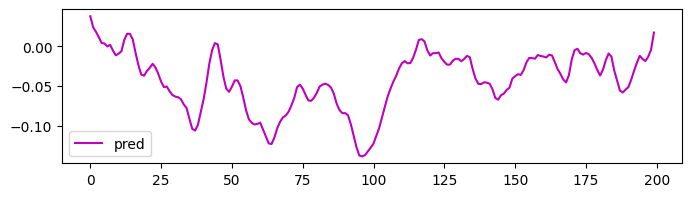

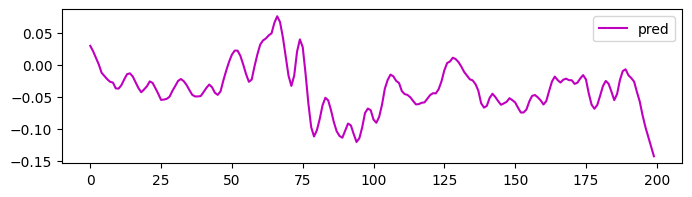

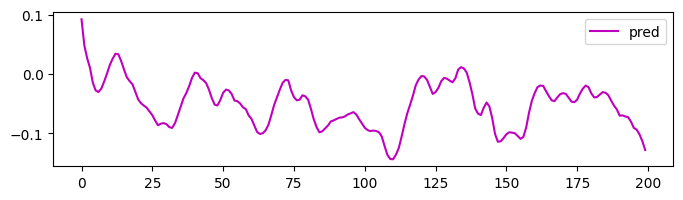

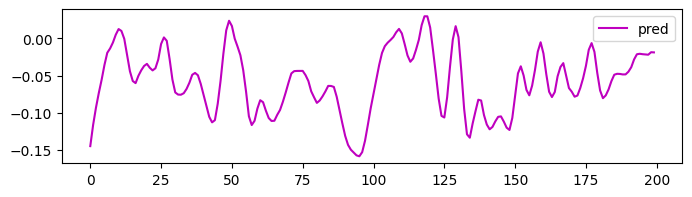

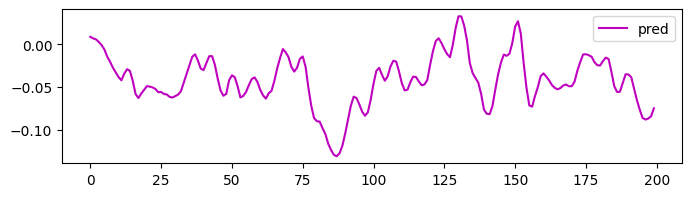

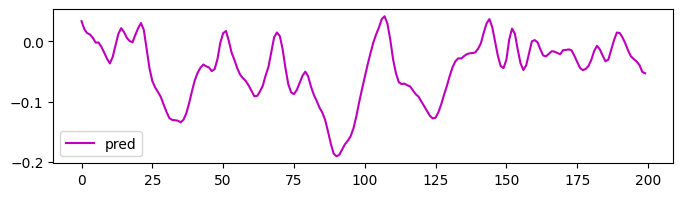

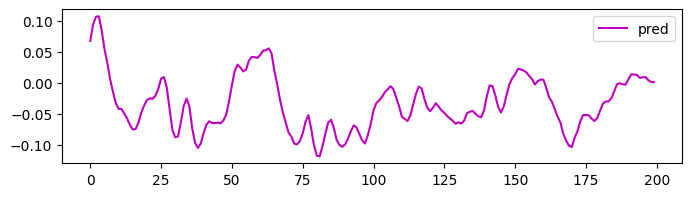

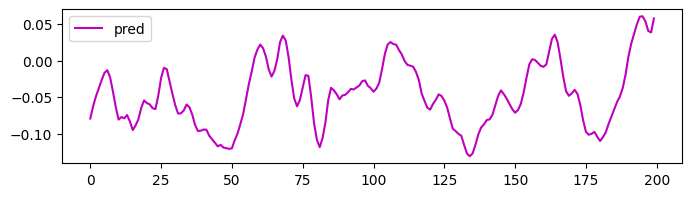

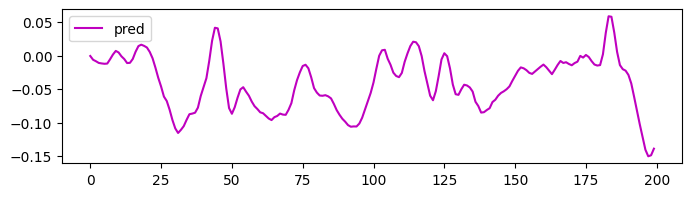

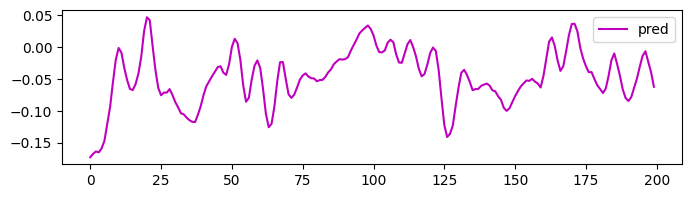

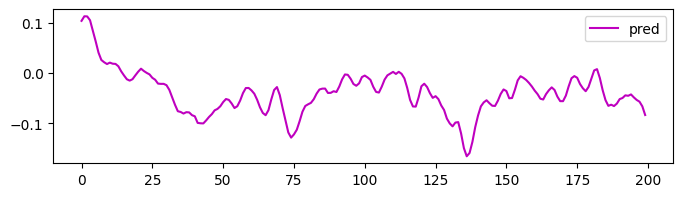

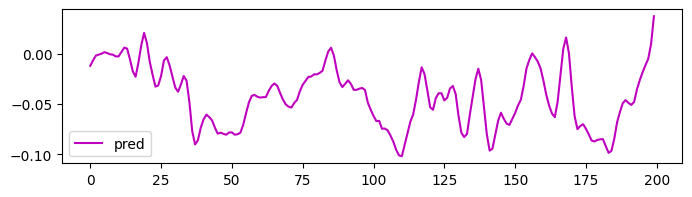

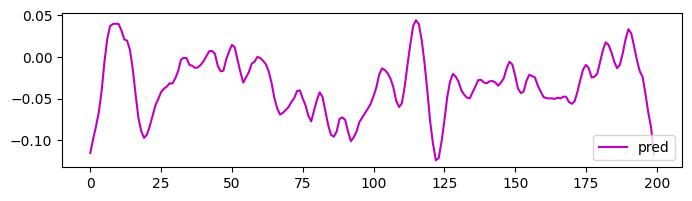

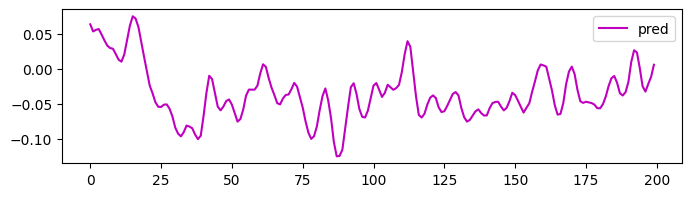

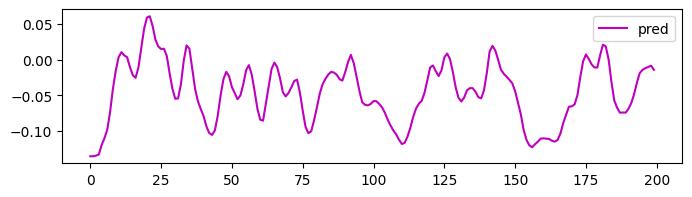

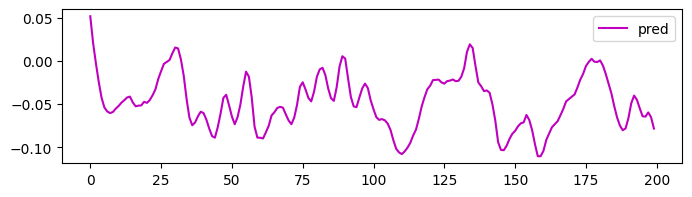

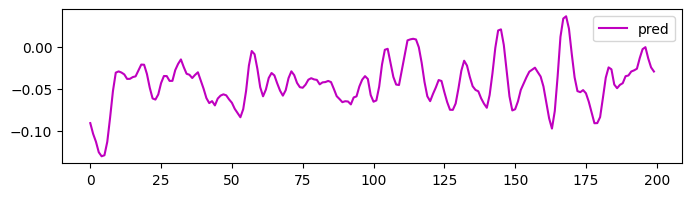

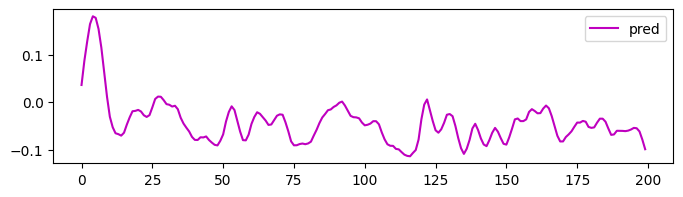

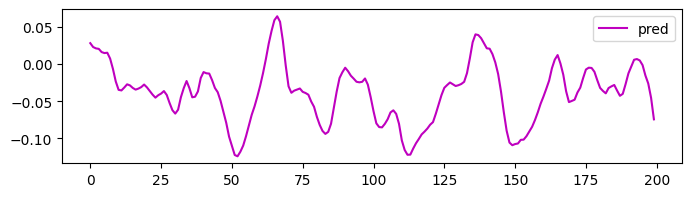

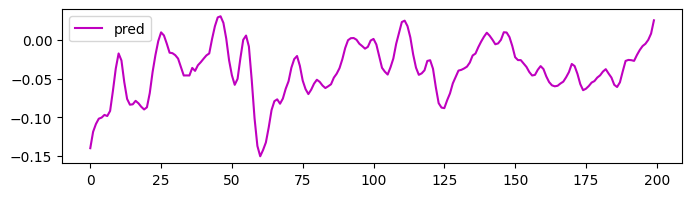

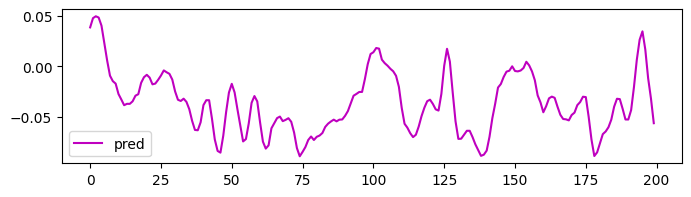

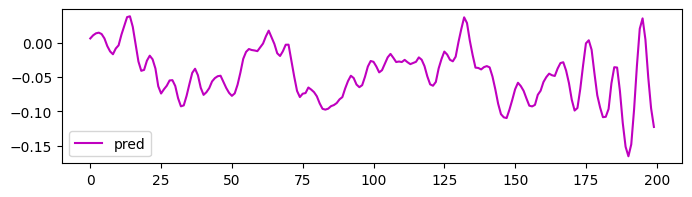

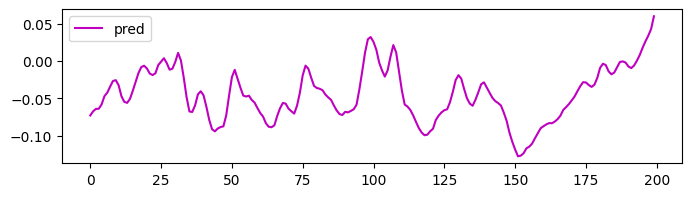

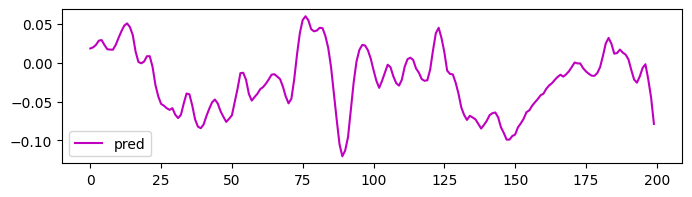

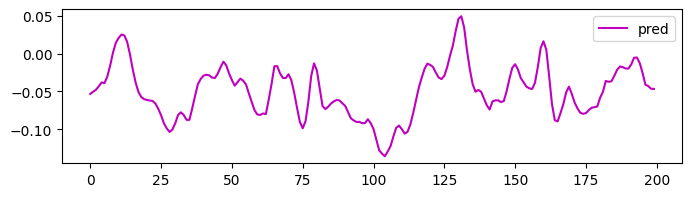

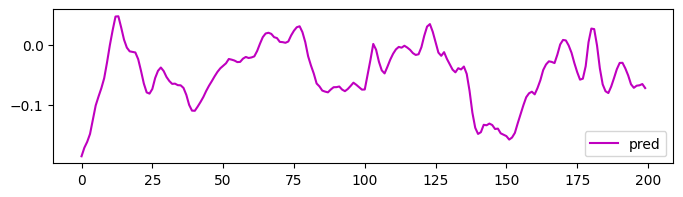

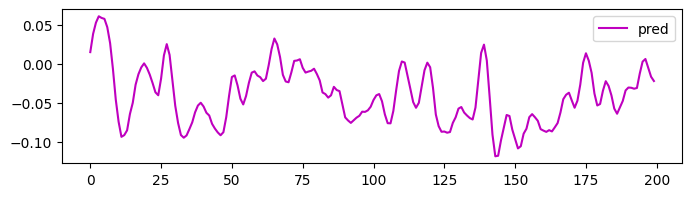

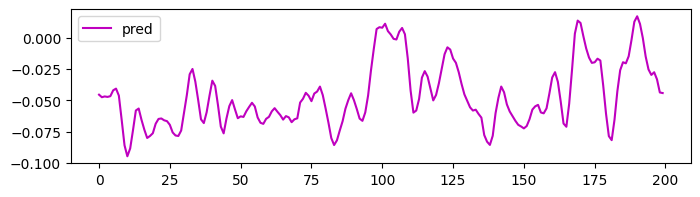

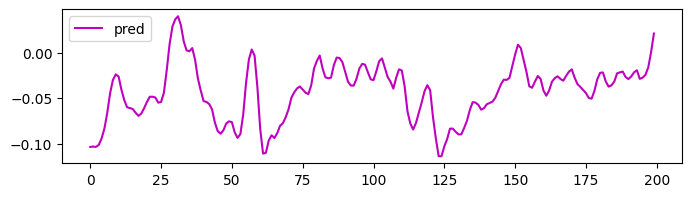

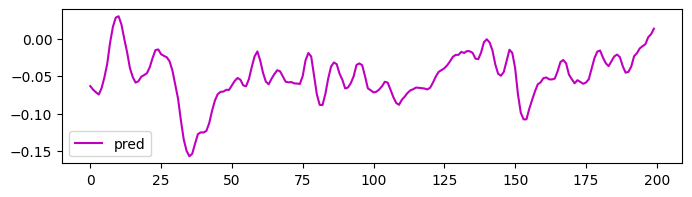

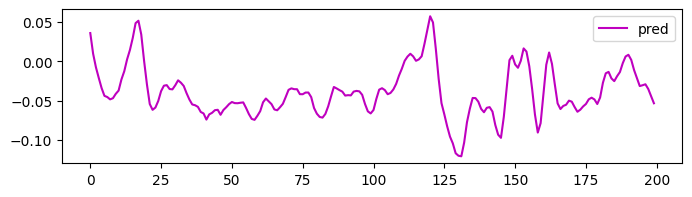

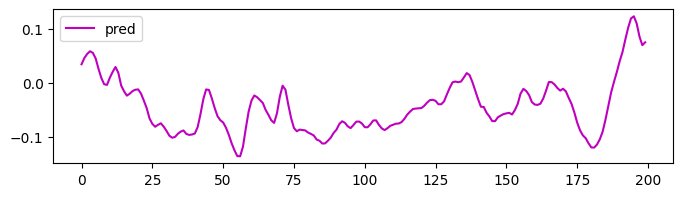

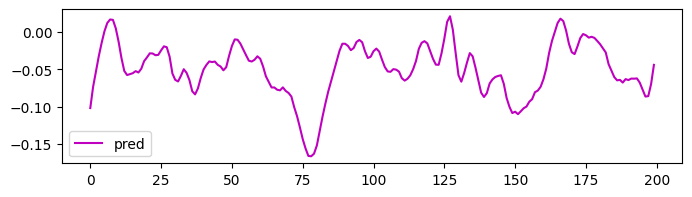

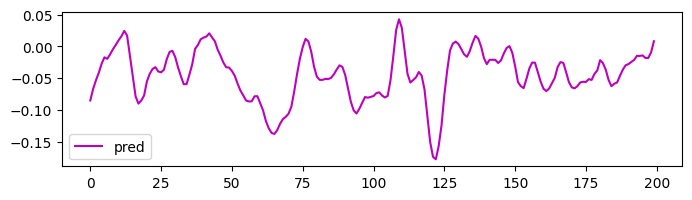

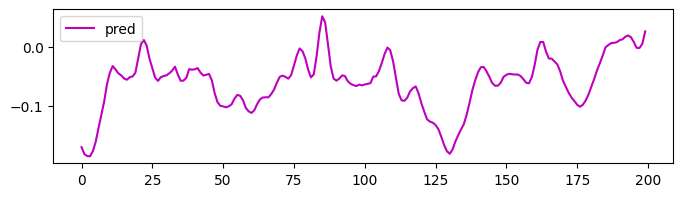

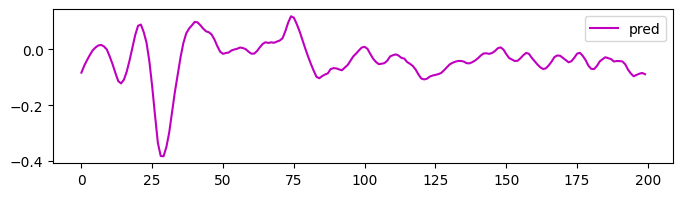

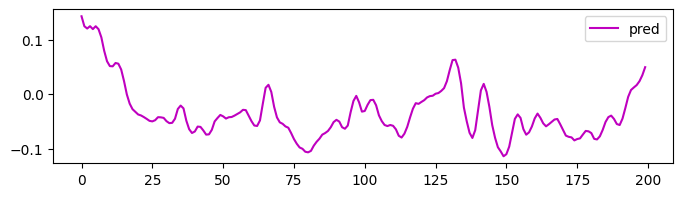

In [49]:
for i in range(100):
    fig = plt.figure(figsize=(8,2))
    #plt.title('snr: ' + str(snr)
    #plt.plot(x_test[i], color='gray', alpha=0.2)
    #plt.plot(y_test[i], color='blue', label='truth')
    plt.plot(pred[i], color='m', label='pred')
    plt.legend()
    plt.show()

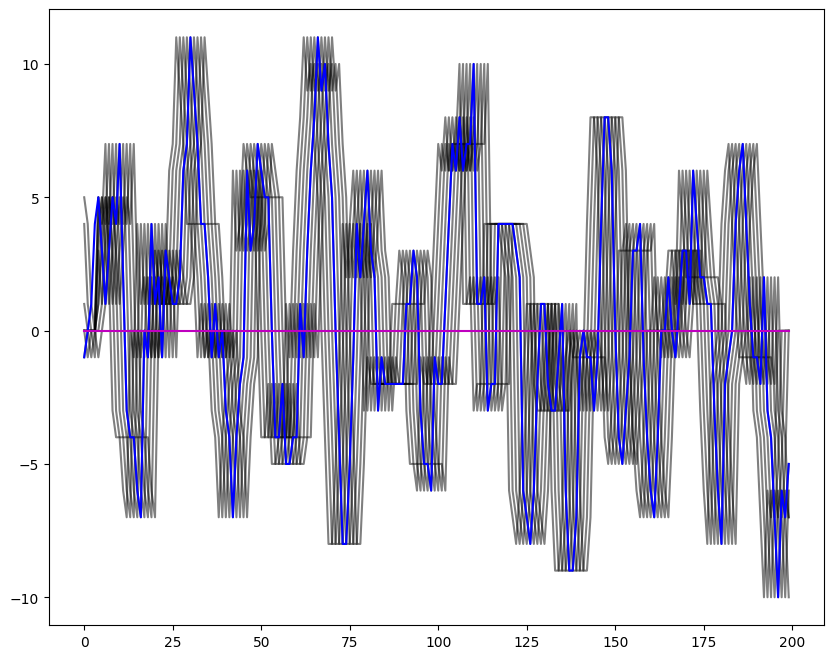

In [101]:
ig = plt.figure(figsize=(10,8))
plt.plot(rolled_test_dataset_x[0]*std+mean, color='black', alpha=0.5)
plt.plot(x_test[0], color='blue')
plt.plot(y_test[0], color='m')
plt.show()


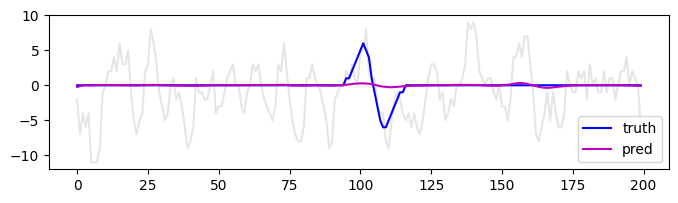

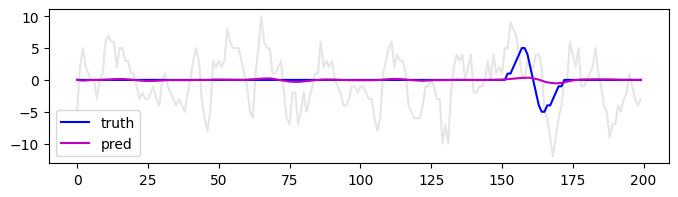

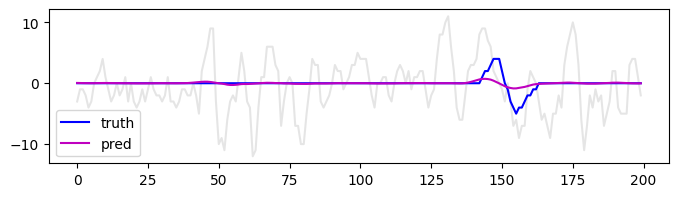

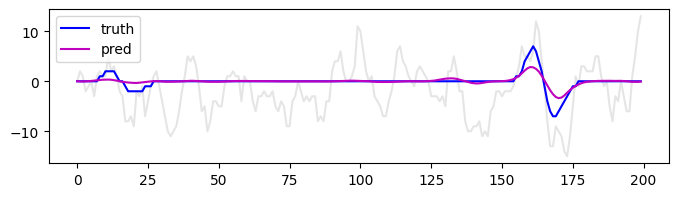

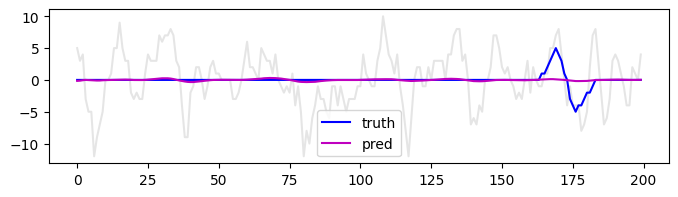

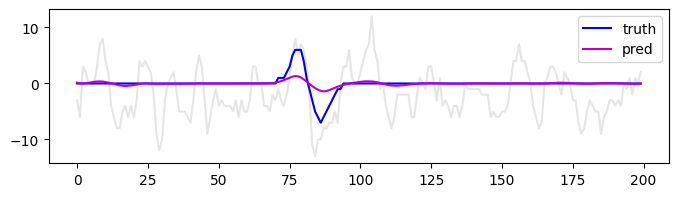

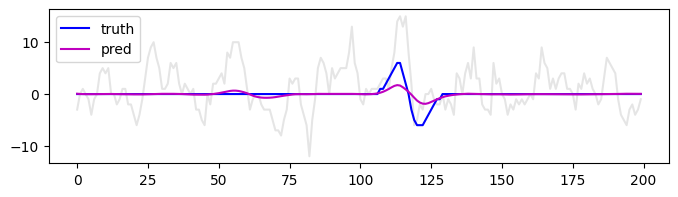

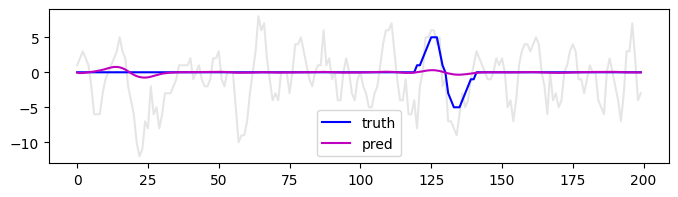

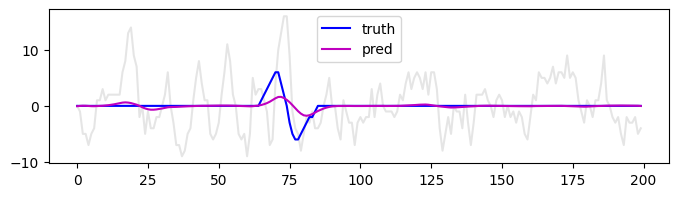

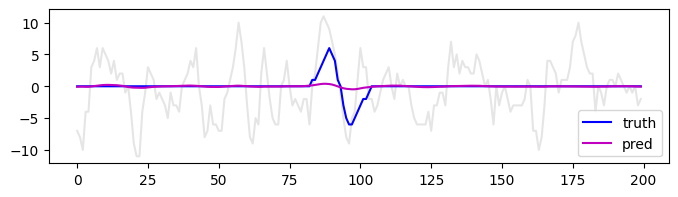

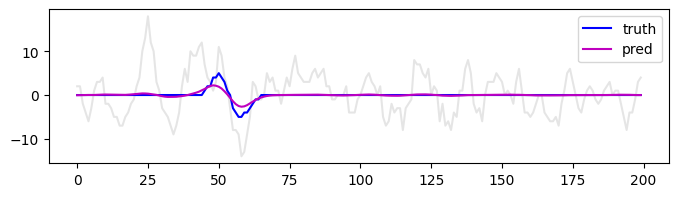

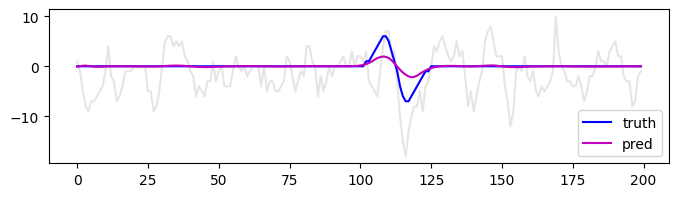

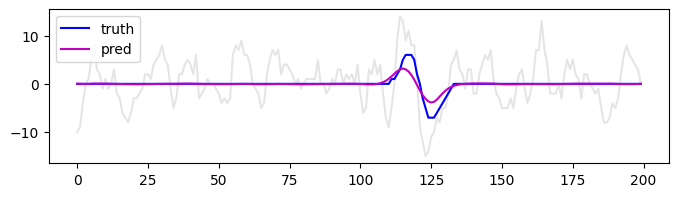

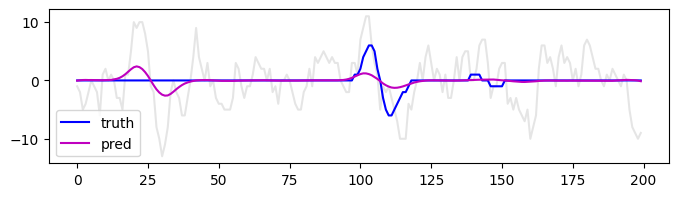

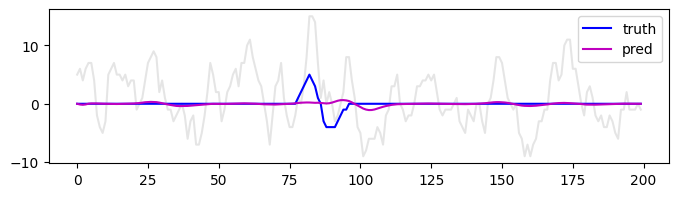

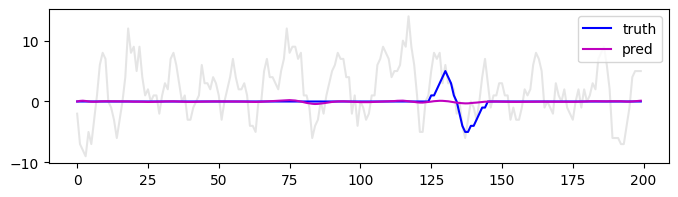

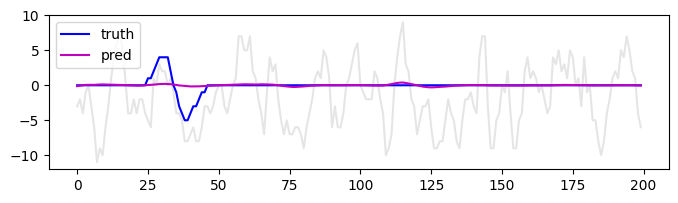

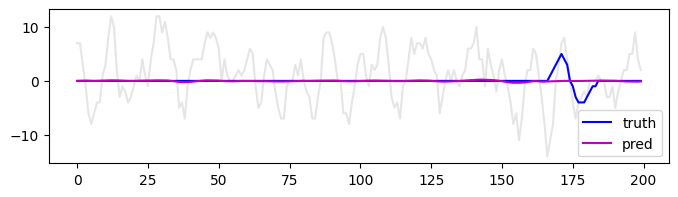

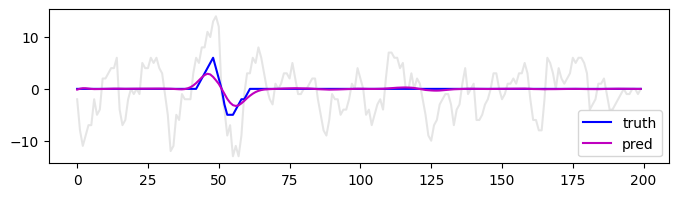

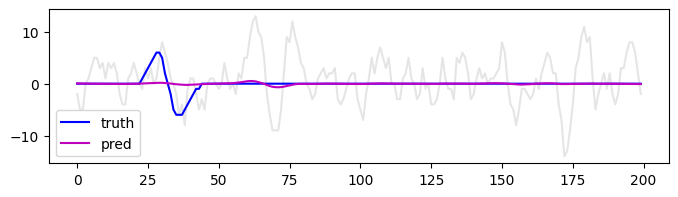

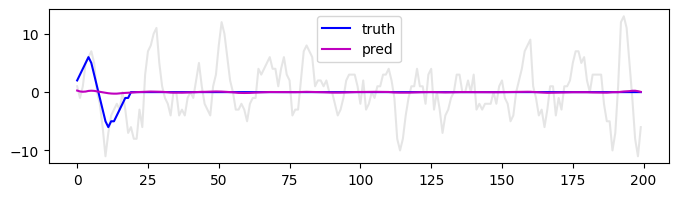

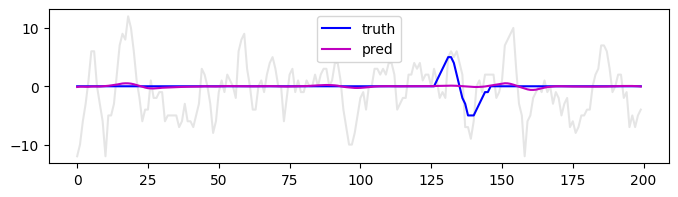

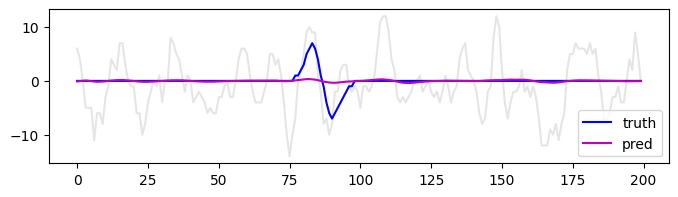

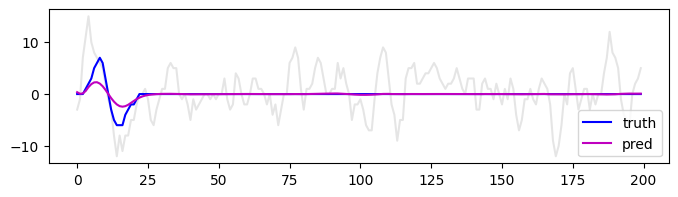

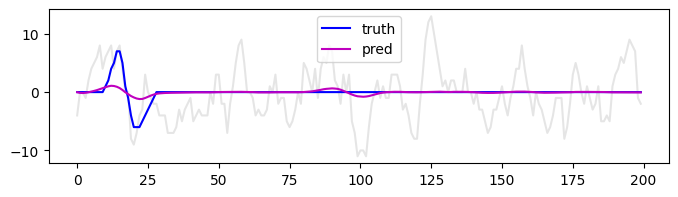

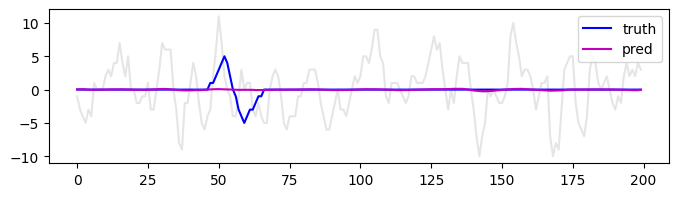

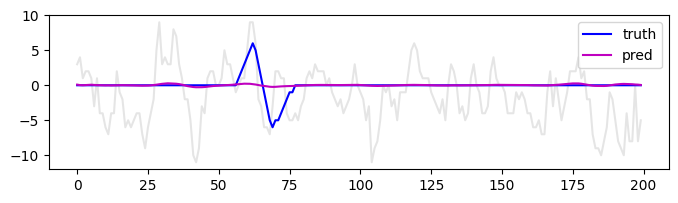

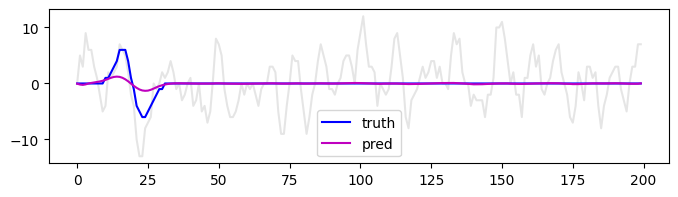

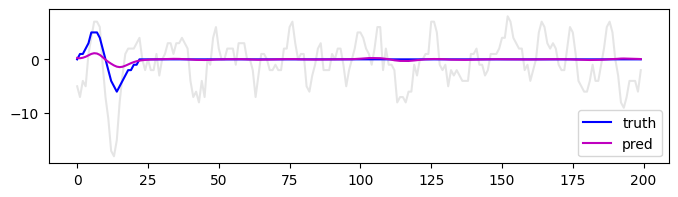

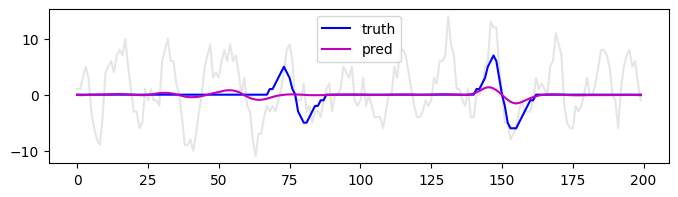

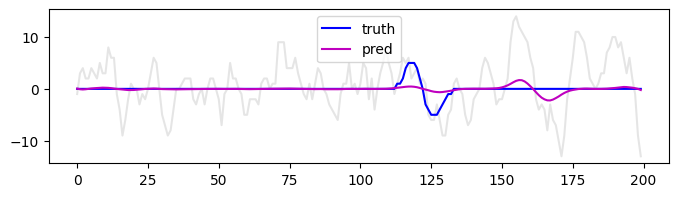

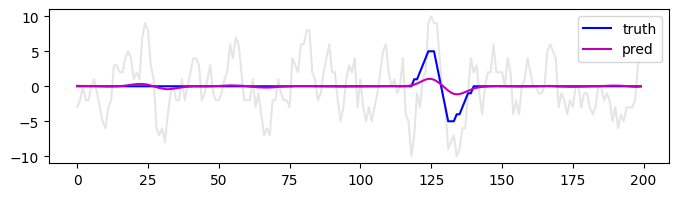

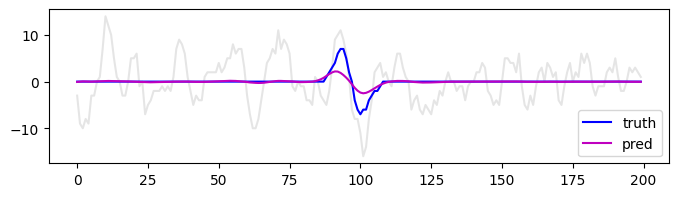

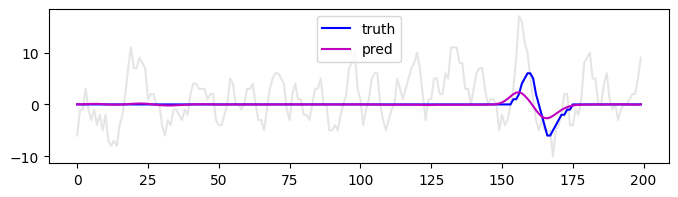

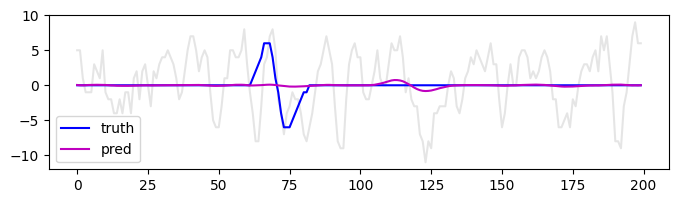

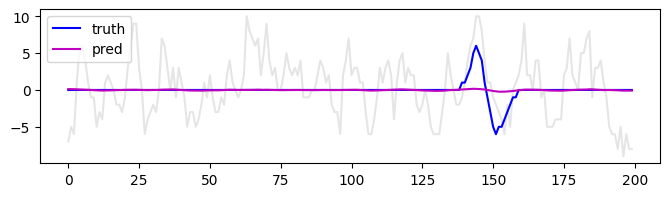

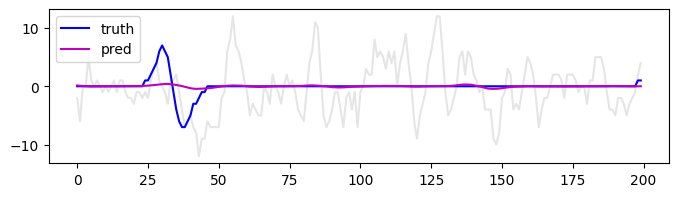

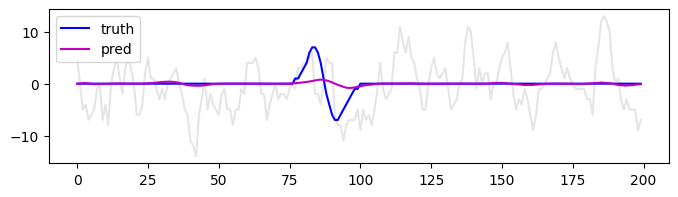

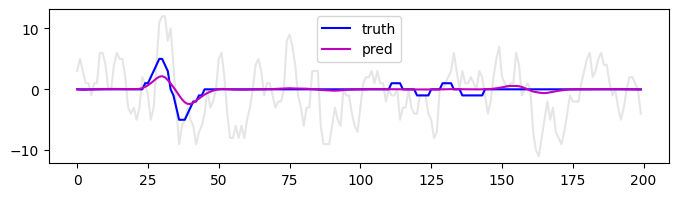

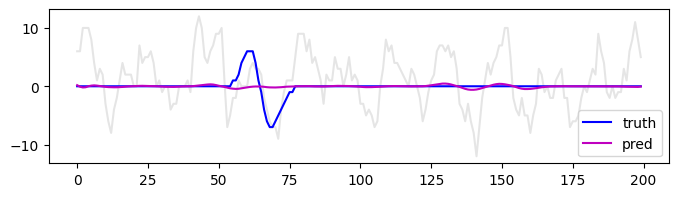

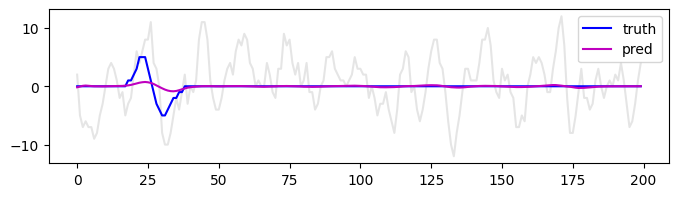

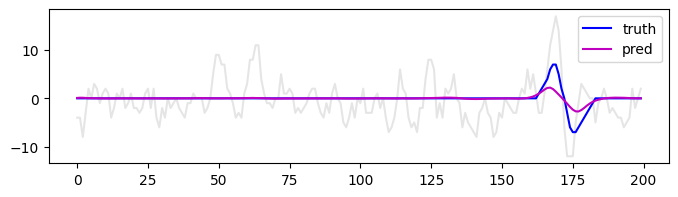

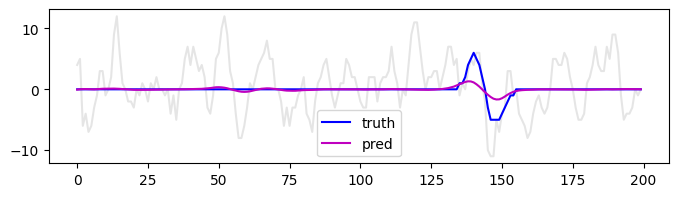

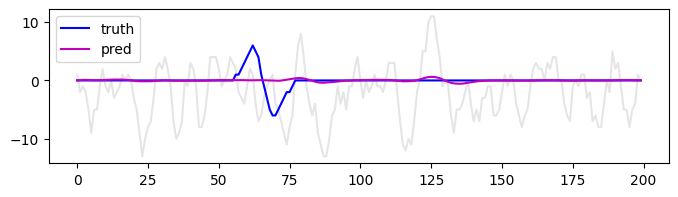

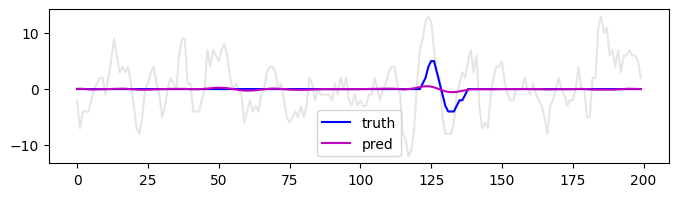

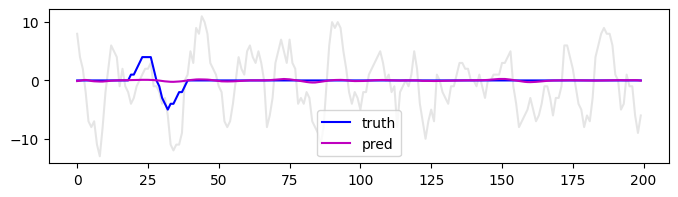

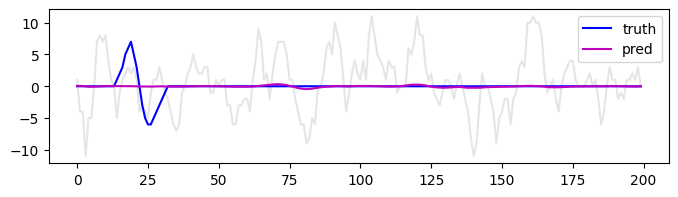

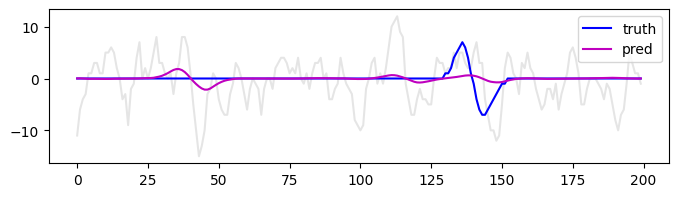

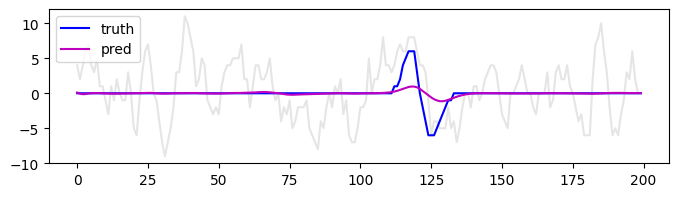

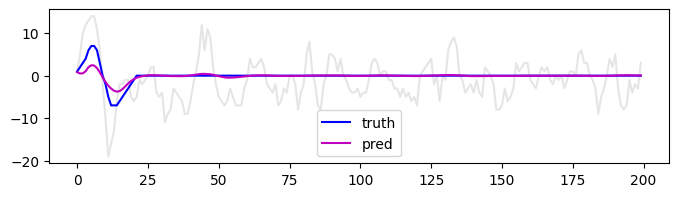

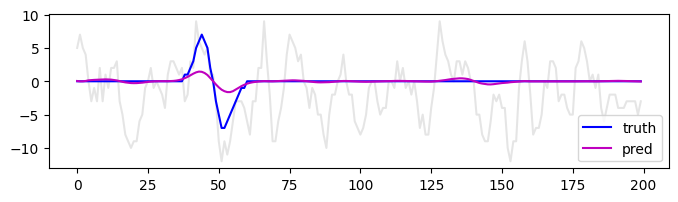

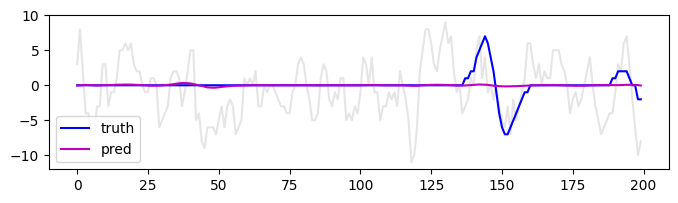

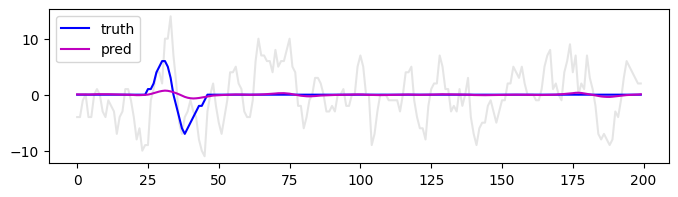

In [93]:
for i in range(100):
    if max(abs(y_test[i])) != 0:
        fig = plt.figure(figsize=(8,2))
        #plt.title('snr: ' + str(snr)
        plt.plot(x_test[i], color='gray', alpha=0.2)
        plt.plot(y_test[i], color='blue', label='truth')
        plt.plot(pred[i], color='m', label='pred')
        plt.legend()
        plt.show()

In [56]:
def plot_pred(data, snr, num_plots):
    print('SNR: ' + str(snr))
    #shifted_ = f.shift_data(test.copy())
    noisy_test = f.add_gaussian_noise(data.copy(), snr)
    print('rolling signals...')
    rolled_test_dataset_x = []
    for wave in noisy_test:
        rolled_test_dataset_x.append(roll_signal(wave, 9))
    rolled_test_dataset_x = np.array(rolled_test_dataset_x)
    print('done!')
    
    print('start inference...')
    pred = model.predict(rolled_test_dataset_x, batch_size=30)
    pred = pred.reshape(pred.shape[0], pred.shape[1])
    
    for i in range(num_plots):
        fig = plt.figure(figsize=(8,2))
        plt.title('snr: ' + str(snr))
        plt.plot(noisy_test[i], color='gray', alpha=0.5)
        plt.plot(data[i], color='blue', label='truth')
        plt.plot(pred[i], color='m', label='pred')
        plt.legend()
        plt.show()

In [57]:
snrs = [2, 1.7, 1.5, 1, 0.7, 0.6, 0.5]

SNR: 2
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 95ms/step


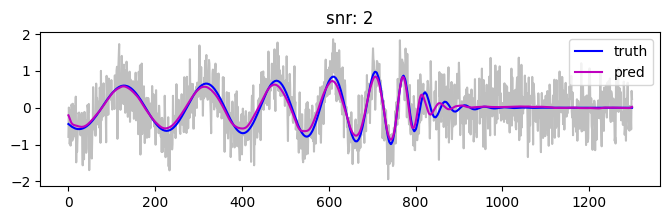

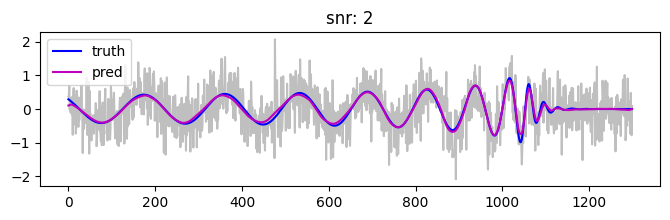

SNR: 1.7
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 96ms/step


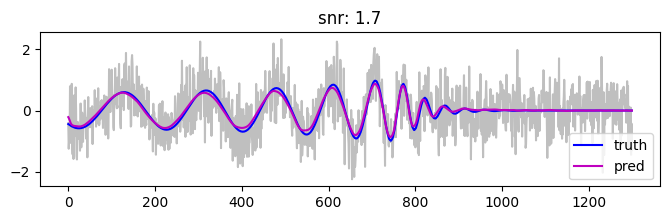

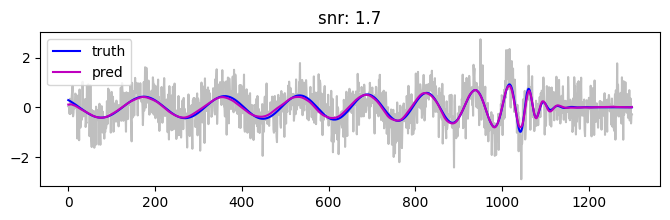

SNR: 1.5
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 96ms/step


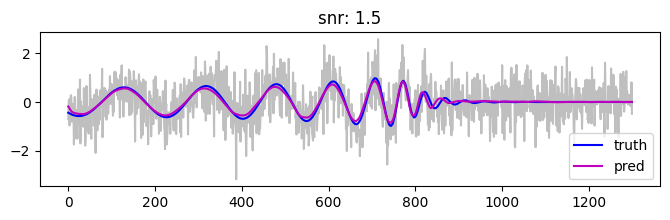

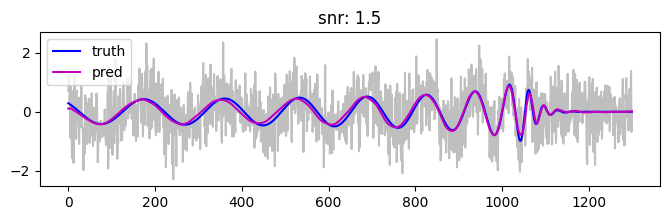

SNR: 1
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 96ms/step


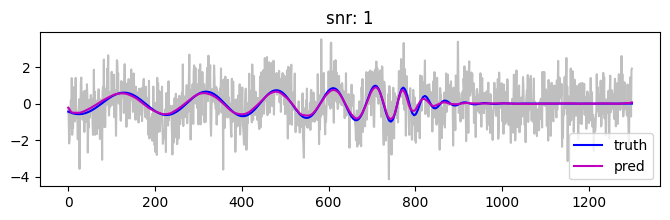

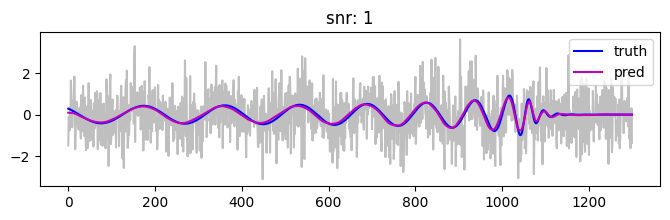

SNR: 0.7
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 96ms/step


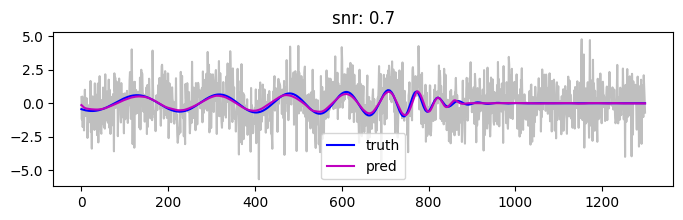

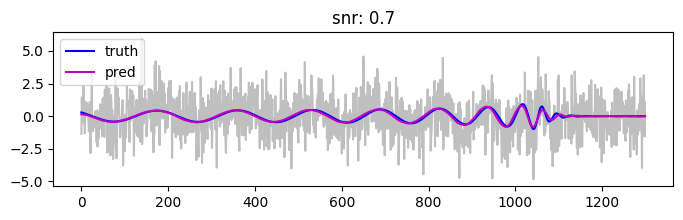

SNR: 0.6
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 95ms/step


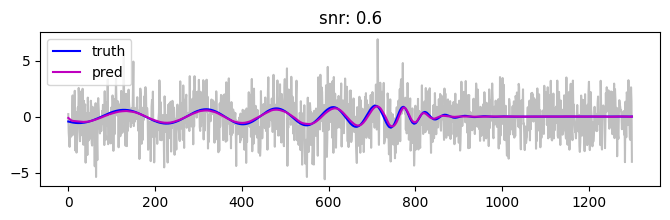

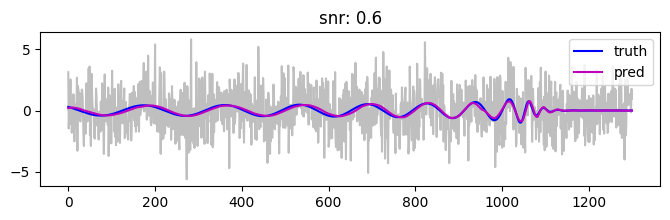

SNR: 0.5
rolling signals...
done!
start inference...
82/82 [==============================] - 8s 96ms/step


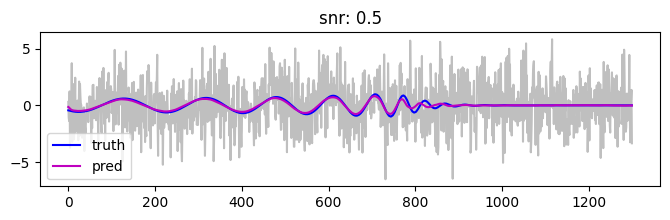

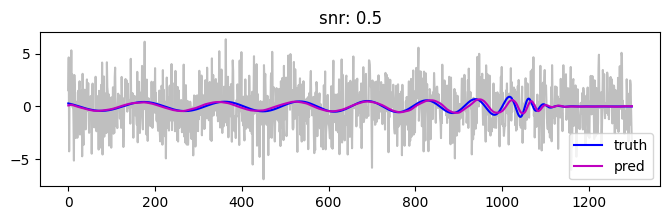

In [58]:
for snr in snrs:
    plot_pred(test, snr, 2)